# One Dimensional Test (in the elevator of Broida Hall)
The measured height from 1st floor to 6th floor is about 17.6 m.

Time duration of measurement: about 100 seconds

Units for all plots: time in seconds, distance in meters, velocity in m/s, acceleration in m/s^2

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
my_data = np.genfromtxt('D:/_xueXi/keCheng/2022S/PHYSCS15CExp/testData0516/accelZ159780454.csv',delimiter=',')

In [3]:
t_list = []
for index, t_interval in enumerate(my_data[:, 0]):
    t_list.append(sum(my_data[:index, 0]))

In [4]:
t_interval = my_data[:, 0]
accel_ax_list = my_data[:,1]

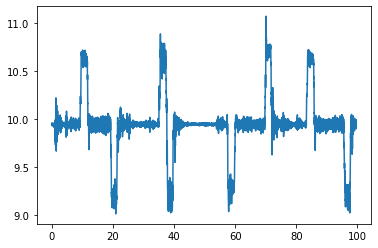

In [5]:
# plot acceleration data
plt.plot(t_list, accel_ax_list)
plt.show()

In [6]:
# calibration
index = next(x for x, val in enumerate(t_list) if val>5)
calibration_ax = sum(accel_ax_list[:index])/index
calibration_ax

9.941348653477217

In [7]:
accel_ax_list_calib = accel_ax_list - calibration_ax
accel_ax_list_calib

array([-0.00395665, -0.00395665, -0.00634965, ...,  0.02236435,
        0.04988235,  0.01398935])

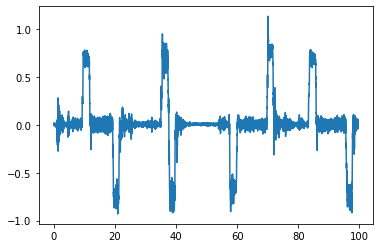

In [8]:
# plot calibrated acceleration data
plt.plot(t_list, accel_ax_list_calib)
plt.show()

In [9]:
#arrayZeros = [ x if abs(x) > 0.5 else 0.0 for x in accel_ax_list_calib]

In [10]:
#plt.plot(t_list, arrayZeros)
#plt.show()

In [66]:
totNum = len(t_interval)
veloX_list = [0,]
posiX_list = [0,]

i=0
while i<totNum-1:
    newVeloX = veloX_list[i] + accel_ax_list_calib[i] * t_interval[i]
    if abs(newVeloX)<0.003:
        veloX_list.append(0)
    else:
        veloX_list.append(newVeloX)
    posiX_list.append(posiX_list[i] + veloX_list[i] * t_interval[i])
    i+=1

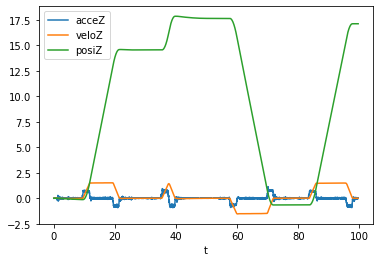

In [67]:
plt.figure()
plt.plot(t_list, accel_ax_list_calib, label = 'acceZ')
plt.plot(t_list, veloX_list, label = 'veloZ')
plt.plot(t_list, posiX_list, label = 'posiZ')
plt.xlabel('t')
plt.legend()
plt.show()

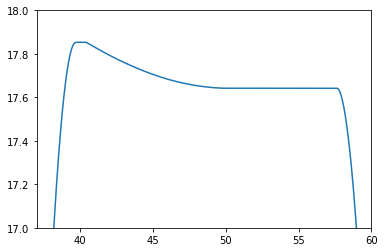

In [69]:
plt.figure()
plt.plot(t_list, posiX_list, label = 'posiZ')
plt.xlim(37,60)
plt.ylim(17,18)
plt.show()

In [13]:
len(veloX_list)

16701

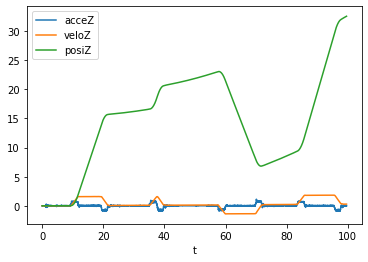

In [61]:
totNum = len(t_interval)
veloX_list = [0,]
posiX_list = [0,]

i=0
while i<totNum-1:
    newVeloX = veloX_list[i] + accel_ax_list_calib[i] * t_interval[i]
    if abs(newVeloX)<0.001:
        veloX_list.append(0)
    else:
        veloX_list.append(newVeloX)
    posiX_list.append(posiX_list[i] + veloX_list[i] * t_interval[i])
    i+=1

plt.figure()
plt.plot(t_list, accel_ax_list_calib, label = 'acceZ')
plt.plot(t_list, veloX_list, label = 'veloZ')
plt.plot(t_list, posiX_list, label = 'posiZ')
plt.xlabel('t')
plt.legend()
plt.show()

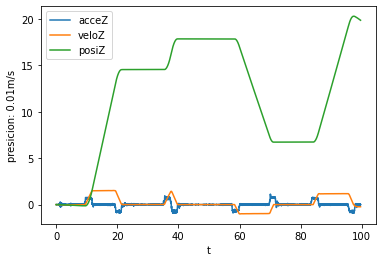

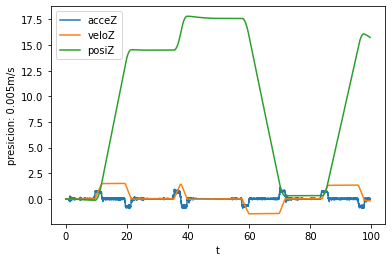

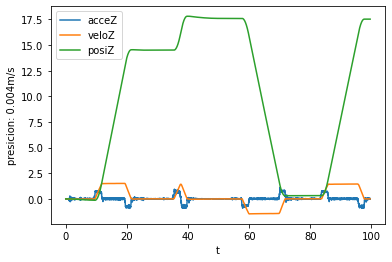

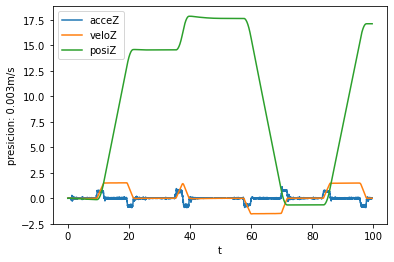

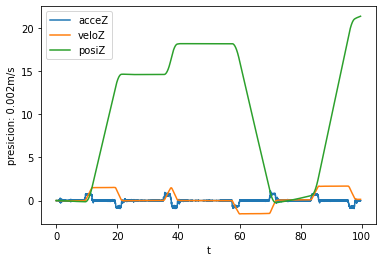

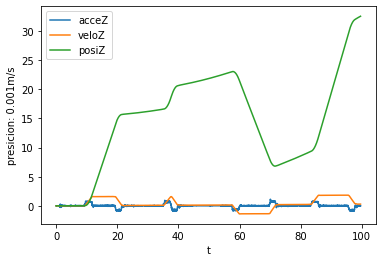

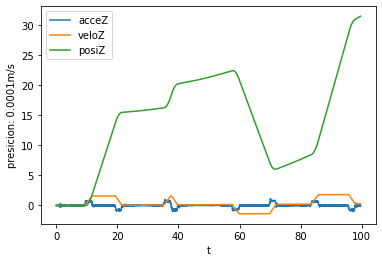

In [63]:
for precisionValue in [0.01, 0.005, 0.004, 0.003, 0.002, 0.001, 0.0001]:

    totNum = len(t_interval)
    veloX_list = [0,]
    posiX_list = [0,]

    i=0
    while i<totNum-1:
        newVeloX = veloX_list[i] + accel_ax_list_calib[i] * t_interval[i]
        if abs(newVeloX)<precisionValue:
            veloX_list.append(0)
        else:
            veloX_list.append(newVeloX)
        posiX_list.append(posiX_list[i] + veloX_list[i] * t_interval[i])
        i+=1

    plt.figure()
    plt.plot(t_list, accel_ax_list_calib, label = 'acceZ')
    plt.plot(t_list, veloX_list, label = 'veloZ')
    plt.plot(t_list, posiX_list, label = 'posiZ')
    plt.xlabel('t')
    plt.ylabel('presicion: '+str(precisionValue)+'m/s')
    plt.legend()
    plt.show()